# Lesson P1 &ndash; Pandas Series


In this module, we will talk about the pandas library for Python.

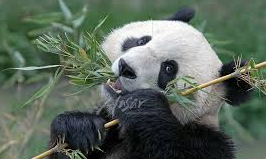

In order to run the examples in this module, you will first need to run the code in the cell below.  These four lines of code import the Series and DataFrame objects and the numpy and pandas libraries.





In [3]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np

When running examples in this module, if you ever get the error message:  **"NameError: name 'Series' is not defined"**, then you need to need to re-run the cell above with the from/input statements.

### Outline for this module:

* Tabular Data Structures (Pandas)
* Learning goals
  * Understand how floating point numbers are stored and implications of this
  * Learn to use the one- and two-dimensional data structures in Pandas (Series, DataFrame) to store, manipulate, and aggregate data
* Readings
  * PDA Ch 5, Ch 6
* Topics
  * Floating point numbers
  * Series
  * DataFrames
  * Operations
    * Sorting, some aggregation
  * Indexing
* Exercises
  * Exercise P1.1:  Create a Series data object
  * Exercise P1.2:  Create a DataFrame data object, extract and sum a column
  * Exercise P1.3:  Use a .sum, .mean, and .idxmax to answer questions about data in a DataFrame
  * Exercise P1.4:  Sort a DataFrame by its index.  Sort it again based on a column.


### But first...

But first, let's look at a short aside about floating point numbers.


## Floating point numbers in Python

Try this:

In [ ]:
a = 0
for i in range(10):
    a += 0.1
print(a)

Wait... what is happening?

Let's try something simpiler...

In [ ]:
0.1 + 0.2

Hmm... that is strange.
How about...

In [ ]:
0.1 + 0.1 + 0.1 == 0.3

Is Python broken?
Should we go back to using IDLE?

### Floating Point Numbers

Python, along with most other high-level programming languages and the chips on your computer, represent floating-point numbers as base 2 (binary) fractions.  This is similar to scientific notation, except in base 2 instead of base 10.

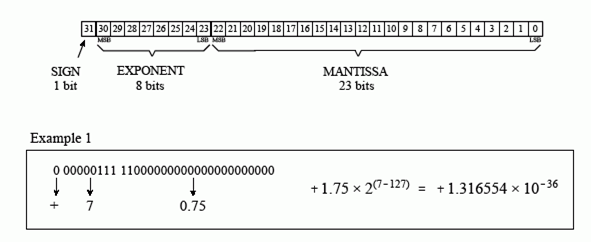

(from: http://www.dspguide.com/ch4/3.htm)

* Decimal fraction:   1.834 = 1 + 8/10 + 3/100 + 4/1000

* Binary fraction:  1.011 = 1 + 0/2 + 1/4 + 1/8 

* Exponent bias:  subtract 127 from exponent



### Approximations
* Python, along with most other programming languages and the chips on your computer, represent floating-point numbers as base 2 (binary) fractions.

* Unfortunately, many decimal fractions cannot be represented exactly as binary fractions.

* Thus, the decimal FP numbers we enter are stored as binary FP numbers that are very close approximations

* Actually, we have this problem with decimal fractions also.

* Consider 1/3 in decimal:
  * 0.3,    0.333,    0.3333333333333333
  * all are approximations

* With binary fractions, the decimal value 0.1 has the same problem.

### str.format

If you don't want to see all the decimal places of an approximated floating point number, you can use the str.format() method to indicate how many decimal places you want to display.

In [ ]:
a = 0.1 + 0.2
print(a)
print ("{0:.2f}".format(a))
print(a)

For more information and details about the str.format() method see:

* https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points

* https://docs.python.org/3/library/string.html#formatstring

* https://docs.python.org/3/tutorial/inputoutput.html



### Exercise P1.1
Modify the code below to print the value of the variable ``a`` to four decimal places.


In [ ]:
a = 0.1 + 0.2
print ("{0:.2f}".format(a))

----------
And now...

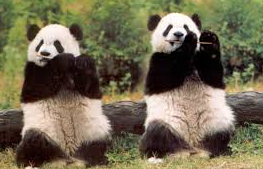

## Pandas

* pandas is a powerful Python library for data analysis and analytics

* Series, DataFrame

* Indexing

* Aggregation and groupby operations

In order to use pandas, you will need to use the following four import lines:


In [1]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np

Line 1 imports the Series and DataFrame objects from the pandas library so that we can use them directly as Series and DataFrame.

Line 2 imports the entire pandas library and allows us to refer to it using "pd".  Thus, pd.Series is the same as Series.

Line 3 imports the random number generator from numpy.random and allows us to refer to it as "randn".

Line 4 imports numpy as np, thus we can use things like np.array().

-----------------
## Pandas &ndash; Series

* Series are a one-dimensional data structure that pandas provides to us.

* A series contains an array of data &ndash; a numpy ndarray in fact.

* A series also has an associated array of data labels called its index.



In [2]:
s = Series([31, 25, 18])
print(s)

0    31
1    25
2    18
dtype: int64


In this example, we did not specify and index, so pandas creates a default index of intergers for us.

We can also access the values or the index in a Series like this:

In [ ]:
print(s.values)

In [ ]:
print(s.index)

-----------------------------
### Series Index

When creating a Series, you can specify an index:

In [3]:
s = Series([31, 25, 18],
           index=['inls285', 'inls382', 'inls523'])
print(s.values)
print(s.index)


[31 25 18]
Index(['inls285', 'inls382', 'inls523'], dtype='object')


Series can be created from lists:


In [ ]:
a = [31, 25, 18]
b = ['inls285', 'inls382', 'inls523']
s = Series(a, index=b)
print(s)

---------
### Selecting Elements from a Series

We can select elements from a Series using either their position, or their corresponding index


In [ ]:
s = Series([31, 25, 18],
           index=['inls285', 'inls382', 'inls523'])
print(s[1])
print(s['inls382'])

----------
### Series Operations and Indexing

* Operations can be applied across the Series

* Elements can be selected using Boolean expressions


In [ ]:
s13 = Series([31, 25, 18], index=['inls285', 'inls382', 'inls523'])

s14 = Series([29, 23, 14], index=['inls285', 'inls382', 'inls523'])

print(s13+1)

In [ ]:
print(s14*2)

In [ ]:
print(s13 + s14)

In [ ]:
print(s13[s13>20])

In [ ]:
print(s14[s14>20])

In [ ]:
print(s14[s13>20])

----------
### Iterating over Series

Series can be used like collections.

We can iterate over the items in a Series.


In [ ]:
print(s14)
print()

for n in s14:
    print(n)


-----------
### Series from Dicts

* Series can be created from dicts

* Can be used like an ordered dict

* map index vals to data vals


In [4]:
d = {'a': 5, 'b': 10, 'c': 15}
s = Series(d)
print(d)

{'a': 5, 'b': 10, 'c': 15}


In [ ]:
print(s)

In [ ]:
if 'a' in s:
    print (s['a'])


---------
### Series from Dict

* When creating a Series from a dict

* If an index is provided, only items that match will be included.

* If the index has “extra” items, they will get `NaN`

  * NaNmeans not a number –treated as “missing” data


Note that in this case, the Series used float64 even though we gave it integers. This is because NaNis only supported for floats.

In [ ]:
d = {'a': 5, 'b': 10, 'c': 15}
s = Series(d)
print(d)

In [ ]:
print(s)

In [ ]:
if 'a' in s:
    print (s['a'])

-----
### Series Name & Index Name

* Series are objects

* A Series has a name attribute.

* The index of a series also has a name attribute.

In [ ]:
print(s14)

In [ ]:
s14.name = "Spring 2016"
s14.index.name = "Course names"
print(s14)

---------
### Series –Index assignment

* The index of a series can be changed by assignment.

In [ ]:
print(s14)

In [ ]:
s14.index = ['INLS 285', 'INLS 382', 'INLS 523']
print(s14)

-----
### Excercise P1.2 &ndash; Series practice

Stop the video at this point and work on the following exercise.

* Create two Series objects:

  * `aug_plays`, `sept_plays`

* Both should use the same index vals:
    * Britney Spears, Depeche Mode, Lady Gaga

* Use the play counts shown on the right as values (just type them in)
  

* Use aug_playsand sept_playsto create avg_plays
  * e.g.:  (Aug + Sept) / 2
  * Hint 1: You can convert floats to integers like this: ``int(3.7)``
  * Hint 2: You can round floats like this: ``round(3.7)``

Your output goal should be:
```
In [91]: aug_plays
Out[91]: 
Britney Spears    190
Depeche Mode      274
Lady Gaga         344
dtype: int64

In [92]: sept_plays
Out[92]: 
Britney Spears    123
Depeche Mode      497
Lady Gaga         273
dtype: int64

In [94]: avg_plays
Out[94]: 
Britney Spears    156
Depeche Mode      385
Lady Gaga         308
dtype: int64
```

